### Importing required libraries

In [95]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### Importing datasets of five connections

In [96]:
first_dataset = pd.read_csv("five_conn/p55/first__connection_topo2_p055.csv")
second_dataset = pd.read_csv("five_conn/p55/second__connection_topo2_p055.csv")
third_dataset = pd.read_csv("five_conn/p55/third__connection_topo2_p055.csv")
fourth_dataset = pd.read_csv("five_conn/p55/fourth__connection_topo2_p055.csv")
fifth_dataset = pd.read_csv("five_conn/p55/fifth__connection_topo2_p055.csv")

In [97]:
df = pd.concat([first_dataset, second_dataset, third_dataset, fourth_dataset])
dataset = df.copy()

In [98]:
def get_max(train, test, col):
    return max(train[col].max(), test[col].max())

for col in df.columns[80:]:
    max_val = get_max(dataset, fifth_dataset, col)
    df[col] = df[col]/max_val

for col in fifth_dataset.columns[80:]:
    max_val = get_max(dataset, fifth_dataset, col)
    fifth_dataset[col] = fifth_dataset[col]/max_val

In [99]:
df

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,1.000318,0.750001,0.748107,0.748107,0.933395,0.933395,0.931246,0.931246
1,0,0,0,0,0,0,0,0,0,0,...,0,0.3375,1.000314,0.750001,0.740998,0.740998,0.934903,0.934903,0.931878,0.931878
2,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,1.000321,0.750001,0.748101,0.748101,0.933394,0.933394,0.930725,0.930725
3,1,0,0,0,0,0,0,0,0,0,...,0,0.0125,1.000313,0.750001,0.736001,0.736001,0.935971,0.935971,0.932162,0.932162
4,1,0,0,0,0,0,0,0,0,0,...,0,0.3375,1.000319,0.750001,0.740990,0.740990,0.934902,0.934902,0.931135,0.931135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,1.001084,0.750001,0.748920,0.748920,0.932750,0.932750,0.831961,0.831961
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,1.001058,0.750001,0.749162,0.749162,0.932715,0.932715,0.834472,0.834472
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,1.001024,0.750001,0.749421,0.749421,0.932682,0.932682,0.837942,0.837942
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,1.000971,0.750001,0.749717,0.749717,0.932653,0.932653,0.843391,0.843391


In [100]:
fifth_dataset

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.5875,1.000003,0.500002,0.496865,0.496865,0.998119,0.998119,0.999191,0.999191
1,0,0,0,0,0,1,0,0,0,0,...,0,0.0750,1.000000,0.500002,0.491610,0.491610,0.999798,0.999798,1.000000,1.000000
2,0,0,0,0,0,1,0,0,0,0,...,0,0.5875,1.000005,0.500002,0.496862,0.496862,0.998119,0.998119,0.998719,0.998719
3,0,0,0,0,0,1,0,0,0,0,...,0,0.0750,1.000002,0.500002,0.491606,0.491606,0.999797,0.999797,0.999411,0.999411
4,0,0,0,0,0,1,0,0,0,0,...,0,0.4875,1.000013,0.500002,0.495824,0.495824,0.998443,0.998443,0.996454,0.996454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,1.000517,0.500002,0.499831,0.499831,0.996863,0.996863,0.899207,0.899207
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,1.000500,0.500002,0.499984,0.499984,0.996825,0.996825,0.901723,0.901723
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,1.000477,0.500002,0.500146,0.500146,0.996788,0.996788,0.905198,0.905198
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,1.000442,0.500002,0.500326,0.500326,0.996753,0.996753,0.910656,0.910656


In [101]:
df['pw'] = df['pw']/get_max(dataset, fifth_dataset, col)

In [102]:
fifth_dataset['pw'] = fifth_dataset['pw']/get_max(dataset, fifth_dataset, col)

In [103]:
df.to_csv('five_conn/norm/normalized_training_connection_topo_p055.csv')
fifth_dataset.to_csv('five_conn/norm/normalized_test_connection_topo_p055.csv')


In [104]:
X_train = df.copy()
X_train.drop(X_train.columns[-1:-4:-1], axis=1, inplace=True) #[-1:-6:-1]
y_train = df[df.columns[-1]]

In [105]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,ch,pw,path,s_ase,e_ase,s_osnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8000,0.041061,0.750001,0.748107,0.748107,0.933395
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3375,0.041061,0.750001,0.740998,0.740998,0.934903
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8000,0.041061,0.750001,0.748101,0.748101,0.933394
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0125,0.041061,0.750001,0.736001,0.736001,0.935971
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3375,0.041061,0.750001,0.740990,0.740990,0.934902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9500,0.041093,0.750001,0.748920,0.748920,0.932750
3236,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9625,0.041092,0.750001,0.749162,0.749162,0.932715
3237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9750,0.041090,0.750001,0.749421,0.749421,0.932682
3238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9875,0.041088,0.750001,0.749717,0.749717,0.932653


In [106]:
X_test = fifth_dataset.copy()
X_test.drop(X_test.columns[-1:-4:-1], axis=1, inplace=True)
y_test = fifth_dataset[fifth_dataset.columns[-1]]

In [107]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12960, 86) (12960,)
(3240, 86) (3240,)


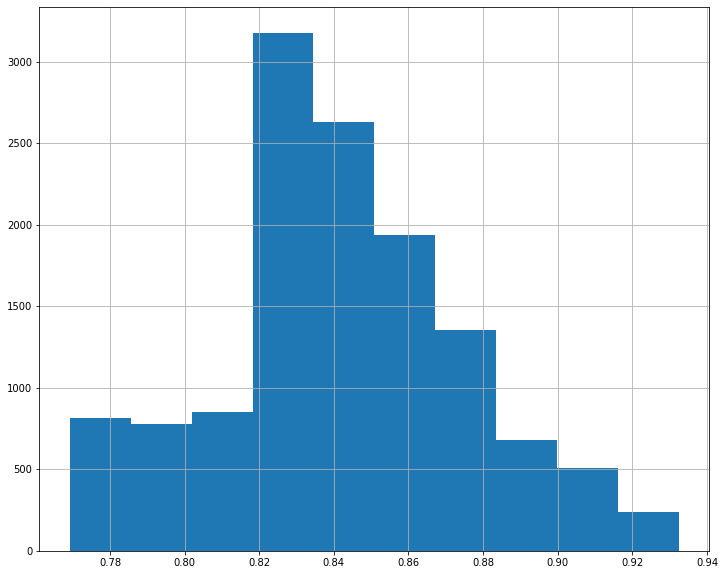

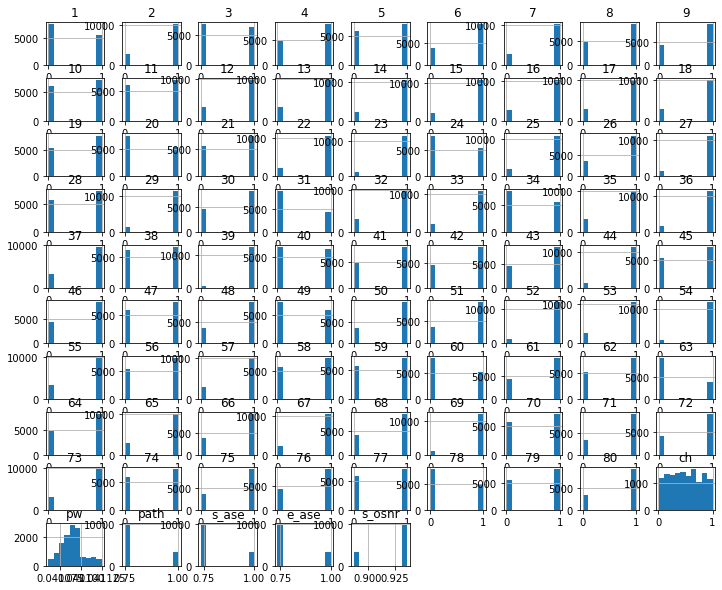

In [108]:
y_train.hist(figsize = (12,10))
X_train.hist(figsize = (12,10))
plt.show()

In [109]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [110]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12960, 86) (12960,)
(3240, 86) (3240,)


### Lasso Model for p=.50

In [111]:
C=[100,1000,1500,2000,3000,4000,10000, 12000, 15000, 20000, 25000, 40000, 50000, 100000, 1000000] #
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score


for Ci in C:
    model = Lasso(alpha=1/(2*Ci),max_iter=7000)
    _ = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f"C = {Ci}")
    print("Training score:", model.score(X_train, y_train))
    print("Testing score:", model.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, preds))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, preds)), '\n')
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    # print(f"{Ci} {model.score(Xtest,ytest)}")

C = 100
Training score: 0.592966508093888
Testing score: -8.700569768480687
MAE of Lasso Regression: 0.07996226788487366
RMSE of Lasso Regression: 0.08194007059501446 

C = 1000
Training score: 0.8616046133644925
Testing score: -10.636985644012208
MAE of Lasso Regression: 0.0890417893026221
RMSE of Lasso Regression: 0.08974659105739205 

C = 1500
Training score: 0.8717322902222387
Testing score: -9.345473753042093
MAE of Lasso Regression: 0.08387241331436478
RMSE of Lasso Regression: 0.08461997712947918 

C = 2000
Training score: 0.8792615327979963
Testing score: -7.765012107566989
MAE of Lasso Regression: 0.07708201121216976
RMSE of Lasso Regression: 0.07788861335173188 

C = 3000
Training score: 0.8938703357710304
Testing score: -4.17758371996565
MAE of Lasso Regression: 0.05886035678181062
RMSE of Lasso Regression: 0.059863385890836694 

C = 4000
Training score: 0.8995277816003946
Testing score: -2.674984526164993
MAE of Lasso Regression: 0.04925574488724277
RMSE of Lasso Regression

C:\Users\rkhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e-01, tolerance: 1.425e-03
  model = cd_fast.enet_coordinate_descent(


### Ridge Model for p = 0.50

In [115]:
C=[5,10,50,100, 125, 130,  135, 140, 150]
for Ci in C:
    ridge = Ridge(alpha=1/(2*Ci),max_iter=10000)
    _ = ridge.fit(X_train,y_train)
    pred_train_lr= ridge.predict(X_test)
    print(f"C = {Ci}")
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    print("Training score:", ridge.score(X_train, y_train))
    print("Testing score:", ridge.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, pred_train_lr))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, pred_train_lr)), '\n')


C = 5
Training score: 0.9080529242813175
Testing score: 0.3710247344195883
MAE of Lasso Regression: 0.01813423850373832
RMSE of Lasso Regression: 0.0208648129459126 

C = 10
Training score: 0.9083840821107323
Testing score: 0.4198121312985402
MAE of Lasso Regression: 0.017227736870386236
RMSE of Lasso Regression: 0.02003927632613638 

C = 50
Training score: 0.9101726007539287
Testing score: 0.6623207195271388
MAE of Lasso Regression: 0.012178059522130387
RMSE of Lasso Regression: 0.015287973416807533 

C = 100
Training score: 0.9113122598330351
Testing score: 0.7937875327682902
MAE of Lasso Regression: 0.009179028161471588
RMSE of Lasso Regression: 0.011946898423862897 

C = 125
Training score: 0.9116728944217787
Testing score: 0.8125487404677834
MAE of Lasso Regression: 0.008952392517750573
RMSE of Lasso Regression: 0.011390476528159965 

C = 130
Training score: 0.9117347095993092
Testing score: 0.8131781782287418
MAE of Lasso Regression: 0.008984778319135887
RMSE of Lasso Regression:

In [75]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.7481066 , 0.93339478,
        0.93124569],
       [0.        , 0.        , 0.        , ..., 0.74099782, 0.93490253,
        0.9318776 ],
       [0.        , 0.        , 0.        , ..., 0.74810086, 0.93339417,
        0.93072524],
       ...,
       [1.        , 1.        , 1.        , ..., 0.74942136, 0.93268213,
        0.83794231],
       [1.        , 1.        , 1.        , ..., 0.7497165 , 0.93265272,
        0.84339138],
       [1.        , 1.        , 1.        , ..., 0.75012192, 0.932635  ,
        0.85524912]])

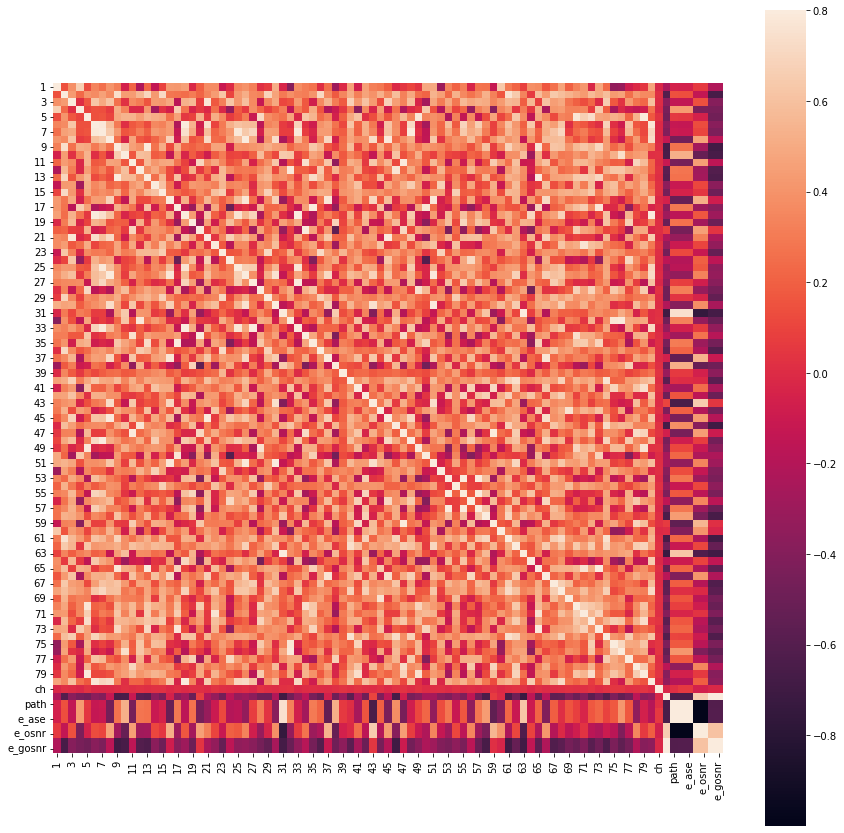

In [53]:
Cx = dataset.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(Cx, vmax = .8, square = True)
plt.show()

### RandomForest Model for p=.50

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

estimators=[100, 200, 300, 1000]
for  Ei in estimators:
    print(f"Estimator - {Ei}")
    model = RandomForestRegressor(n_estimators=Ei)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    MAE = mean_absolute_error(y_test , predicted)
    print('Random forest validation MAE = ', MAE)
    # Display accuracy score
    print(f'Random forest accuracy = ', model.score(X_test, y_test))
    print(f'RMSE forest = ', np.sqrt(mean_squared_error(y_test , predicted)))

Estimator - 100
Random forest validation MAE =  0.019135329531103272
Random forest accuracy =  0.20706738269117375
RMSE forest =  0.0234269555473275
Estimator - 200
Random forest validation MAE =  0.020141177354471174
Random forest accuracy =  0.1466445571135685
RMSE forest =  0.024303157053924742
Estimator - 300
Random forest validation MAE =  0.02090013331545014
Random forest accuracy =  0.10150420264320748
RMSE forest =  0.024937662157311417
Estimator - 1000
Random forest validation MAE =  0.019832670022060555
Random forest accuracy =  0.16682949751133636
RMSE forest =  0.02401400821767789


### LinearRegression Model for p=0.50


In [114]:
# LINEARREGRESSION MODEL 

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train) 
print("accuracy score for linear: ", linear.score(X_test,y_test))
print("RMSE for linear :",np.sqrt(mean_squared_error(y_test,linear.predict(X_test))))
r2_score(y_test,linear.predict(X_test))

accuracy score for linear:  -72533.15400069438
RMSE for linear : 7.085475277224409


-72533.15400069438

In [94]:

model = RandomForestRegressor()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
MAE = mean_absolute_error(y_test , predicted)
print('Random forest validation MAE = ', MAE)
# Display accuracy score
print(f'Random forest accuracy = ', model.score(X_test, y_test))
print(f'RMSE forest = ', np.sqrt(mean_squared_error(y_test , predicted)))

Random forest validation MAE =  0.018223475180912198
Random forest accuracy =  0.2560873542010911
RMSE forest =  0.022691263690500865
